In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
data = pd.read_csv("P:/Hypoteza-2-1b_cleaned.csv", parse_dates=["DateFrom", "DateTo", "Vytvoreni_agendy"])

In [3]:
tarif = data[data["IsTrial"]==0]

In [4]:
tarif.fillna(0, inplace=True)
print(tarif.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236229 entries, 2 to 494521
Data columns (total 16 columns):
CompletId                    236229 non-null int64
AgendaId                     236229 non-null int64
SubscriptionType             236229 non-null int64
IsTrial                      236229 non-null int64
DateFrom                     236229 non-null datetime64[ns]
DateTo                       236229 non-null datetime64[ns]
Pocet_vydanych_faktur        236229 non-null float64
Pocet_zalohovych_faktur      236229 non-null float64
Pocet_dobropisu              236229 non-null float64
Pocet_prijatych_faktur       236229 non-null float64
Pocet_kontaktu               236229 non-null float64
Pocet_prodejek               236229 non-null float64
Pocet_pravidelnych_faktur    236229 non-null float64
Pocet_cenikovych_polozek     236229 non-null float64
CurrencyId                   236229 non-null int64
Vytvoreni_agendy             236229 non-null datetime64[ns]
dtypes: datetime64[ns](3), flo

C:\Users\Root\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [5]:
print(tarif["DateTo"].max())

2020-03-31 23:59:59


In [6]:
tarif["duration"] = tarif.loc[:,"DateTo"] - tarif.loc[:,"DateFrom"]
print(tarif["duration"].head())

2     0 days 00:01:58.433000
3     0 days 00:04:32.550000
64    0 days 00:12:09.283000
108   0 days 01:53:52.427000
236   2 days 00:34:31.277000
Name: duration, dtype: timedelta64[ns]


C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# převod timedelta na dny

In [7]:
tarif["num_days"] = tarif.loc[:,"duration"] / dt.timedelta(days=1)

C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
print(tarif.loc[236,"Pocet_kontaktu"] / tarif.loc[236, "num_days"] )

0.0


In [9]:
tarif["Pocet_vydanych_faktur_daily"] = tarif.loc[:,"Pocet_vydanych_faktur"] / tarif.loc[:, "num_days"]
tarif["Pocet_zalohovych_faktur_daily"] = tarif.loc[:,"Pocet_zalohovych_faktur"] / tarif.loc[:, "num_days"]
tarif["Pocet_dobropisu_daily"] = tarif.loc[:,"Pocet_dobropisu"] / tarif.loc[:, "num_days"]
tarif["Pocet_prijatych_faktur_daily"] = tarif.loc[:,"Pocet_prijatych_faktur"] / tarif.loc[:, "num_days"]
tarif["Pocet_kontaktu_daily"] = tarif.loc[:,"Pocet_kontaktu"] / tarif.loc[:, "num_days"]
tarif["Pocet_prodejek_daily"] = tarif.loc[:,"Pocet_prodejek"] / tarif.loc[:, "num_days"]
tarif["Pocet_pravidelnych_faktur_daily"] = tarif.loc[:,"Pocet_pravidelnych_faktur"] / tarif.loc[:, "num_days"]
tarif["Pocet_cenikovych_polozek_daily"] = tarif.loc[:,"Pocet_cenikovych_polozek"] / tarif.loc[:, "num_days"]

C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [10]:
print(tarif.head())

     CompletId  AgendaId  SubscriptionType  IsTrial                DateFrom  \
2       111559    149785                 0        0 2016-06-23 18:15:43.747   
3       111560    149785                 2        0 2016-06-23 18:17:43.180   
64      114351    239593                 0        0 2016-07-03 09:39:06.780   
108     114546    239516                 0        0 2016-07-06 06:44:02.780   
236     114997    240332                 0        0 2016-07-11 09:52:02.423   

                     DateTo  Pocet_vydanych_faktur  Pocet_zalohovych_faktur  \
2   2016-06-23 18:17:42.180                    0.0                      0.0   
3   2016-06-23 18:22:15.730                    0.0                      0.0   
64  2016-07-03 09:51:16.063                    0.0                      0.0   
108 2016-07-06 08:37:55.207                    0.0                      0.0   
236 2016-07-13 10:26:33.700                    0.0                      0.0   

     Pocet_dobropisu  Pocet_prijatych_faktur  ... 

In [11]:
print(tarif["Pocet_kontaktu_daily"].mean())

0.2267701946834804


In [12]:
table = pd.pivot_table(tarif, index="SubscriptionType", values=["Pocet_vydanych_faktur_daily", "Pocet_kontaktu_daily", 
                                                                "Pocet_zalohovych_faktur_daily", "Pocet_dobropisu_daily",
                                                               "Pocet_prijatych_faktur_daily", "Pocet_prodejek_daily",
                                                               "Pocet_pravidelnych_faktur_daily", "Pocet_cenikovych_polozek_daily"])
print(table)

                  Pocet_cenikovych_polozek_daily  Pocet_dobropisu_daily  \
SubscriptionType                                                          
0                                       0.000613               0.000749   
1                                       0.076938               0.002691   
2                                       0.121957               0.007701   
3                                       0.354958               0.063063   

                  Pocet_kontaktu_daily  Pocet_pravidelnych_faktur_daily  \
SubscriptionType                                                          
0                             0.172289                         0.000052   
1                             0.206284                         0.000681   
2                             0.293372                         0.001009   
3                             1.709809                         0.004661   

                  Pocet_prijatych_faktur_daily  Pocet_prodejek_daily  \
SubscriptionType          

In [21]:
tarify = ["Zdarma", "Základní", "Oblíbený", "Prémiový"]

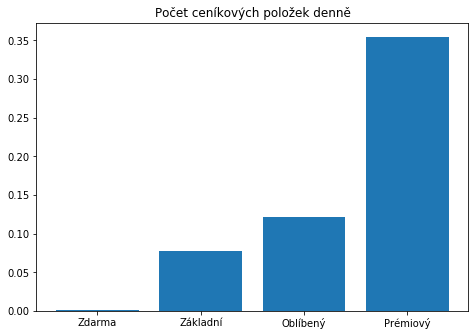

In [25]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(tarify, table.Pocet_cenikovych_polozek_daily)
plt.title("Počet ceníkových položek denně")
plt.show()

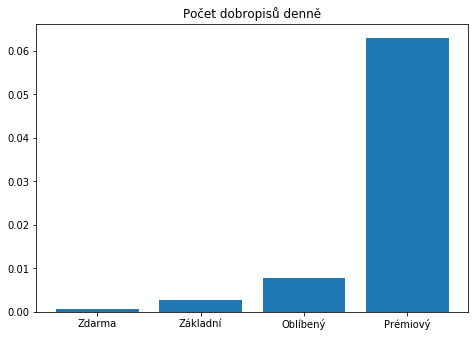

In [26]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(tarify, table.Pocet_dobropisu_daily)
plt.title("Počet dobropisů denně")
plt.show()

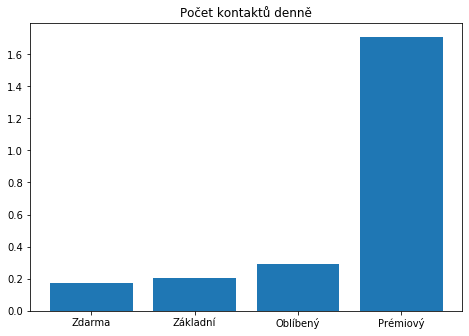

In [27]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(tarify, table.Pocet_kontaktu_daily)
plt.title("Počet kontaktů denně")
plt.show()

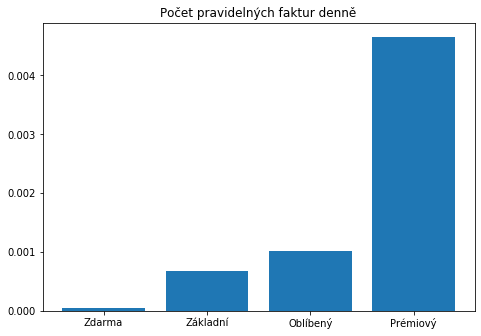

In [28]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(tarify, table.Pocet_pravidelnych_faktur_daily)
plt.title("Počet pravidelných faktur denně")
plt.show()

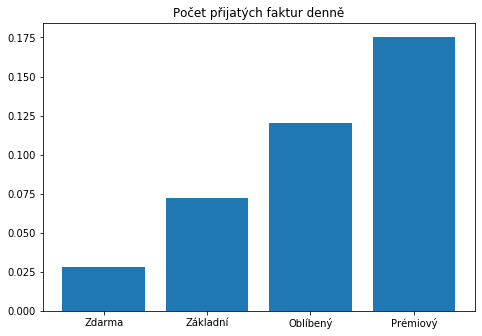

In [29]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(tarify, table.Pocet_prijatych_faktur_daily)
plt.title("Počet přijatých faktur denně")
plt.show()

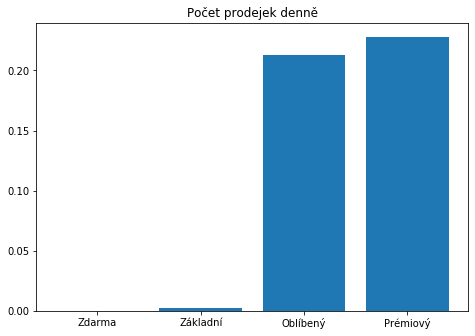

In [30]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(tarify, table.Pocet_prodejek_daily)
plt.title("Počet prodejek denně")
plt.show()

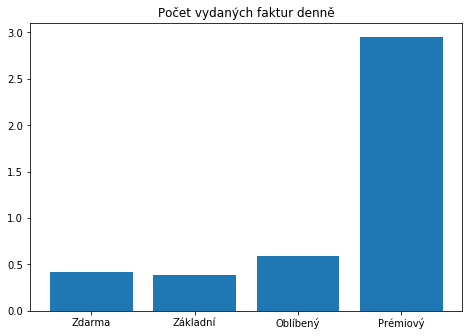

In [31]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(tarify, table.Pocet_vydanych_faktur_daily)
plt.title("Počet vydaných faktur denně")
plt.show()

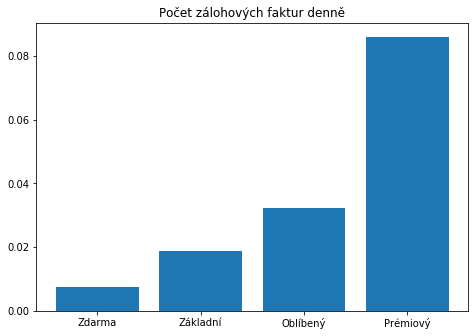

In [32]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(tarify, table.Pocet_zalohovych_faktur_daily)
plt.title("Počet zálohových faktur denně")
plt.show()

# Kdy uživatelé aktivují předplatné

In [33]:
tarif["year"] = tarif['DateFrom'].dt.year
tarif["month"] = tarif['DateFrom'].dt.month
tarif["dayofweek"] = tarif['DateFrom'].dt.dayofweek
tarif["quarter"] = tarif['DateFrom'].dt.quarter
print(tarif.head())

     CompletId  AgendaId  SubscriptionType  IsTrial                DateFrom  \
2       111559    149785                 0        0 2016-06-23 18:15:43.747   
3       111560    149785                 2        0 2016-06-23 18:17:43.180   
64      114351    239593                 0        0 2016-07-03 09:39:06.780   
108     114546    239516                 0        0 2016-07-06 06:44:02.780   
236     114997    240332                 0        0 2016-07-11 09:52:02.423   

                     DateTo  Pocet_vydanych_faktur  Pocet_zalohovych_faktur  \
2   2016-06-23 18:17:42.180                    0.0                      0.0   
3   2016-06-23 18:22:15.730                    0.0                      0.0   
64  2016-07-03 09:51:16.063                    0.0                      0.0   
108 2016-07-06 08:37:55.207                    0.0                      0.0   
236 2016-07-13 10:26:33.700                    0.0                      0.0   

     Pocet_dobropisu  Pocet_prijatych_faktur  ... 

C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [44]:
print(tarif[tarif["year"]==2019].AgendaId.count())

73928


The day of the week with Monday=0, Sunday=6

In [49]:
print(tarif.groupby("dayofweek").CompletId.count())

dayofweek
0    46387
1    41032
2    40028
3    39375
4    31254
5    16215
6    21938
Name: CompletId, dtype: int64


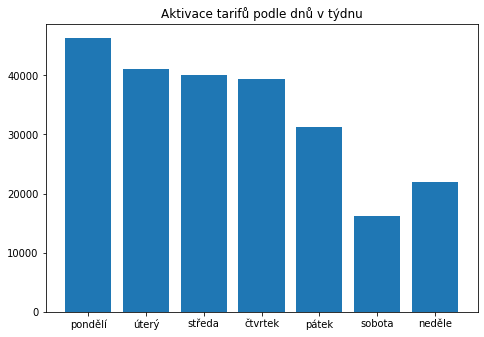

In [50]:
days = ["pondělí", "úterý", "středa", "čtvrtek", "pátek", "sobota", "neděle"]
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(days, tarif.groupby("dayofweek").CompletId.count())
plt.title("Aktivace tarifů podle dnů v týdnu")
plt.show()

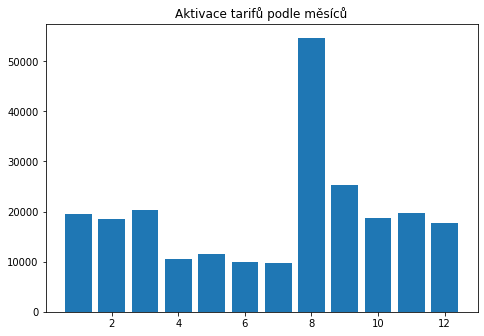

In [53]:
months = [i for i in range (1, 13)]
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(months, tarif.groupby("month").CompletId.count())
plt.title("Aktivace tarifů podle měsíců")
plt.show()

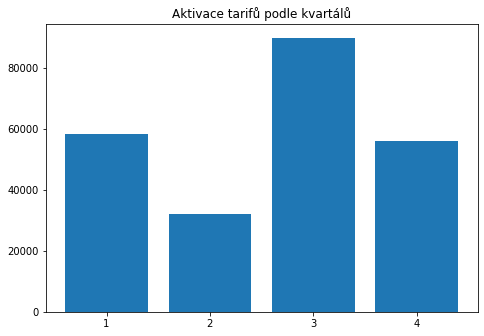

In [57]:
kvartal = [str(i) for i in range (1, 5)]
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(kvartal, tarif.groupby("quarter").CompletId.count())
plt.title("Aktivace tarifů podle kvartálů")
plt.show()